# Top Tagging exercise 1

### 5th Summer School on INtelligent signal processing for FrontIEr Research and Industry, Wuhan, May 2019

## Introduction to the physics problem

### The Standard Model and the top quark

<br>
<img src="img/SM.png" width="400" >

The **Standard Model** of elementary particles represents our knowledge of the microscopic world. It describes the matter constituents (quarks and leptons) and their interactions (mediated by bosons), that are the electomagnetic, the weak and the strong interactions.

Among all these particles, the **top quark** still represents a very peculiar case. It is the heaviest known elementary particle (mass of 172.5 GeV) and it has a very short lifetime ($10^{-25}$ seconds): this means we can only see its decay products. It has been discovered in 1995 by CDF and D0 experiments at Tevatron (Fermilab, Chicago). The top quark is considered a key particle to searches for new physics beyond the Standard Model and to precision measurements.

The ideal tool for measuring the top quark properties is a particle collider. The **Large Hadron Collider** (LHC), situated nearby Geneva, between France and Switzerland, is the largest proton-proton collider ever built on Earth. It consists into a 27 km circumference ring, where proton beams are smashed at a centre-of-mass energy of 13 TeV (99.999999% of speed of light). At the LHC, 40 Million collisions / second occurs, providing an enormous amount of data. Thanks to these data, **ATLAS** and **CMS** experiments discovered the missing piece of the Standard Model, the Higgs boson, in 2012.

During a collision, the energy is so high that protons are "broken" into their fundamental components, i.e. **quarks** and **gluons**, that can interact together, producing particles that we don't observe in our everyday life, such as the top quark. The production of a top quark is, by the way, a relatively "rare" phenomenon, since there are other physical processes that occur way more often, such those initiated by strong interaction, producing lighter quarks (such as up, down, strange quarks). In high energy physics, we speak about the **cross-section** of a process. We say that, the top quark production has a smaller cross-section than the production of light quarks.

The experimental consequence is that distinguishing the decay products of a top quark from a light quark can be extremely difficult, given that the latter phenomenon has a way larger probability to happen.

### Experimental signature of top quark in a particle detector

Let's first understand what are the experimental signatures and how our detectors work. This is a sketch of the CMS experiment.

<br>
<img src="img/EPS_CMS_Slice.png" width="1000" >

A collider detector is organized in layers: each layer is able to distinguish and measure different particles and their properties. For example, the silicon tracker detects each particle that is charged. The electromagnetic calorimeter detects photons and electrons. The hadronic calorimeter detects hadrons (such as protons and neutrons). The muon chambers detect muons (that have a long lifetime and travel through the inner layers).

Our physics problem consists into detecting the so-called "hadronic decay" of a top quark. The decay chain is sketched here: the top quark decays into a bottom quark and into a $W$ boson, that in turn decays into light quarks (in the picture, up and down quarks).

<br>
<img src="img/top.png" width="500" >

Our background is, instead, represented by light quark (or quarks) produced by the strong interaction (in jargon, QCD). Here we have a sketch of one possible background event.

<br>
<img src="img/QCD.png" width="200" >

#### Jets

Without going into the theoretical details, the nature of particles experiencing the strong interaction (like quarks) is such that they cannot travel free, but they are forced to be "confined" into hadrons. One hadron can be seen as a "combination" of quarks. Let's think about the electromagnetic interaction: a positive charge and a negative charge are attracted to each other, and they will tend to form a state that is neutral under the electromagnetic interaction. Analogously, quarks try to combine together, forming a bond state that is neutral under the strong interaction. This process is called **hadronization**, and it has a very important consequence. Quarks won't appear as single isolated particles in a detetctor, but rather as **jets** of particles.

There are many different algorithms that are able to reconstruct quarks (and gluons) as jets (i.e., anti-$k_T$ algorithm https://arxiv.org/abs/0802.1189). They basically loop over the shower of particles produced by the hadronization, trying to cluster them together as one single entity. The algorithms are designed such in a way that the momentum of the clustered jet is proportional to the initial energy of the quark. A sketch giving an intuitive idea of a jet is displayed here (Klaus Rabbertz, KIT):

<br>
<img src="img/Rabbertz_from_quark_to_rec_jet.png" width="500" >

#### Jets substructure

Many physically motivated approaches have been used in the past to distinguish a jet initiated by a top quark from jets due to QCD. One remarkable property is the so-called **jet substructure**. The idea is to try to distinguish how many "sub-jets" are included in a jet. Out of our sketches presented before, since the top quark decays into three separated quarks, we would expect it to show a three-pronged sub-structure. QCD, on the other hand, is mainly due to single quark/gluon radiation, hence it shows a one-pronged sub-structure. One largely used approach to study the jet substructure is the so called *n-subjettiness* (https://arxiv.org/abs/1011.2268).

## Binary classification problem: the machine learning formulation

Our problem is then classifying a jet produced by a top quark (that we will call **signal** event) from a light quark jet due to strong interaction (**background** event).

In this exercise, a quite large dataset is provided. Each event is a Monte Carlo simulation of a jet candidate, that can be signal or background. An integer (0 or 1) will label each jet as background or signal. For each jet, the 4-momenta of its **constituents** (i.e., the particles that are clustered by the jet algorithm) are stored. One can build neural network architectures that are able to understand the nature of a jet only by looking at its constituents.

The very first approach we are going to have in this exercise is trying a classical artificial neural network approach, that is, **Fully Connected Neural Networks**. They are very generic structures, that can be applied in many different classification problems, but that sometimes provides many weights and that can be quite inefficient. We will see another approach in the next tutorial.

Some bibliography about Fully Connected neural network approaches for top quark tagging can be found here:
* https://arxiv.org/abs/1704.02124
* https://arxiv.org/abs/1501.05968

## Understanding the data

In [2]:
import pandas, keras
import numpy as np

Using Theano backend.
Can not use cuDNN on context None: cannot compile with cuDNN. We got this error:
/tmp/try_flags_TBFBYF.c:4:10: fatal error: cudnn.h: No such file or directory
 #include <cudnn.h>
          ^~~~~~~~~
compilation terminated.

Mapped name None to device cuda: Tesla P100-PCIE-16GB (0000:02:00.0)


First, let's have a look at the shape of the input training data. They are stored as `pandas` **`DataFrame`** HDF5 data (see `pandas` notebook), in the format of `PyTables`. 

In [3]:
#This is selecting the full dataset, it will take a while. Comment afterwards, no need to re-run this box!
store_train_full = pandas.HDFStore("jet_data/train.h5")
df_train_full = store_train_full.select("table")

In [4]:
print(df_train_full.shape)
print(len(df_train_full.index))

(1211000, 806)
1211000


We have 1211000 rows, i.e. 1211000 different events, and 806 columns (whose meaning will be explained later).

One useful hint: keep the last events of the training set as test samples to evaluate performances. In order to do so, you can use **`stop`** and **`start`** options in **`select`**:

In [49]:
# Read the first 10k events
# They are quite few, to be increased in later steps
store_train = pandas.HDFStore("jet_data/train.h5")
df_train = store_train.select("table",stop=10000)
print(df_train.shape)


(10000, 806)


In [51]:
# Keep the last 2 k events as test sample
# Suggested in next steps: take up to 100k events for testing
# But remember: do not use the same events for both training and testing!
df_test = store_train.select("table",start=1211000-2000)
print(df_test.shape)

(2000, 806)


Let's print out the first three rows of this dataset:

In [52]:
df_test.iloc[0:3]

,E_0,PX_0,PY_0,PZ_0,E_1,PX_1,PY_1,PZ_1,E_2,PX_2,...,E_199,PX_199,PY_199,PZ_199,truthE,truthPX,truthPY,truthPZ,ttv,is_signal_new
825,169.526245,75.776497,151.409363,-8.501415,125.395874,54.868477,112.522987,-7.221663,38.508755,17.418512,...,0.0,0.0,0.0,0.0,550.695923,264.934357,450.604401,32.289349,0,1
829,163.637970,153.762756,-43.081173,35.754940,122.144646,116.052269,-27.683580,26.168764,80.978577,75.999657,...,0.0,0.0,0.0,0.0,613.624512,545.138794,-206.144470,123.190315,0,1
830,126.687347,-8.607655,-124.406456,-22.329952,111.917465,-13.566514,-110.012711,-15.449068,44.798908,-2.742153,...,0.0,0.0,0.0,0.0,639.651855,24.578804,-592.817688,-167.214325,0,1


The first 800 columns contain the 4-momenta, i.e. energy, $p_x$, $p_y$ and $p_z$, of the first 200 jet constituents. If the constituents are less than 200, the values of the 4-momenta are filled with zeros. The `is_signal_new` column contains the truth information, i.e. it tells if that particular event is signal (`is_signal_new`=1) or background (`is_signal_new`=0). We can disregard the columns starting with "truth" and "ttv".

Let's first focus on the first 20 particle constituents and let's define a list of strings that will be very convenient when loading the pandas **`DataFrame`**.

In [53]:
# four-momenta of leading 20 particles
cols = [c.format(i) for i in range(20) for c in ["E_{0}",  "PX_{0}",  "PY_{0}",  "PZ_{0}"]]

## Building the architecture

We can now start to define a first architecture. The most simple approach is using fully connected layers (**`Dense`** layers in Keras/Tensorflow), with **`relu`** activation function and a **`softmax`** final layer, since we are affording a binary classification problem.

We are considering the 4-momenta of the first 20 jet constituents, i.e. we expect to have a vector of 80 numbers as **`input_shape`**, that should be specified in the first layer of the model.

In [54]:
# Define the network
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, input_shape = (80,), activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(2, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               8100      
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 102       
Total params: 13,252
Trainable params: 13,252
Non-trainable params: 0
_________________________________________________________________


As discussed during the first part of this lab, a very natural choice for loss function and optimizer are, respectively, **`categorical_crossentropy`** and **`adam`**.

In [55]:
# Compile the network
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics = ["accuracy"])

As discussed in the introductory tutorial, we can control **overfitting** with a validation sample.

In [69]:
# Load validation sample, only the first 2k events
# They are 20k in total. Use a larger number afterwards
store_val = pandas.HDFStore("jet_data/val.h5")
df_val = store_val.select("table",stop=2000)
print(df_val.shape)

(2000, 806)


We are now ready to train our model. Let's first try with 10 epochs. The `is_signal_new` information, i.e. being signal (`is_signal_new=1`) or background (`is_signal_new=0`), is what the network is supposed to learn. Let's save the outputs of the training process.

In [70]:
histObj = model.fit(df_train[cols].as_matrix(), keras.utils.to_categorical(df_train["is_signal_new"]), epochs=10, validation_data=(df_val[cols].as_matrix(), keras.utils.to_categorical(df_val["is_signal_new"])))

Train on 10000 samples, validate on 2000 samples
Epoch 1/10
10000/10000 [==============================] - 0s 31us/step - loss: 0.4988 - acc: 0.7481 - val_loss: 0.6086 - val_acc: 0.6910
Epoch 2/10
10000/10000 [==============================] - 0s 27us/step - loss: 0.5013 - acc: 0.7439 - val_loss: 0.5699 - val_acc: 0.7155
Epoch 3/10
10000/10000 [==============================] - 0s 27us/step - loss: 0.5004 - acc: 0.7430 - val_loss: 0.6109 - val_acc: 0.7035
Epoch 4/10
10000/10000 [==============================] - 0s 27us/step - loss: 0.4925 - acc: 0.7499 - val_loss: 0.5977 - val_acc: 0.7090
Epoch 5/10
10000/10000 [==============================] - 0s 27us/step - loss: 0.4922 - acc: 0.7489 - val_loss: 0.5892 - val_acc: 0.7035
Epoch 6/10
10000/10000 [==============================] - 0s 27us/step - loss: 0.4921 - acc: 0.7472 - val_loss: 0.5925 - val_acc: 0.7045
Epoch 7/10
10000/10000 [==============================] - 0s 27us/step - loss: 0.4776 - acc: 0.7615 - val_loss: 0.5898 - val_acc:

We can take advantage of the function to plot learning curves defined in the previous tutorial.

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
def plotLearningCurves(*histObjs):
    """This function processes all histories given in the tuple.
    Left losses, right accuracies
    """
    # too many plots
    if len(histObjs)>10: 
        print('Too many objects!')
        return
    # missing names
    for histObj in histObjs:
        if not hasattr(histObj, 'name'): histObj.name='?'
    names=[]
    # loss plot
    plt.figure(figsize=(12,6))
    plt.rcParams.update({'font.size': 15}) #Larger font size
    plt.subplot(1,2,1)
    # loop through arguments
    for histObj in histObjs:
        plt.plot(histObj.history['loss'])
        names.append('train '+histObj.name)
        plt.plot(histObj.history['val_loss'])
        names.append('validation '+histObj.name)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(names, loc='upper right')
    

    #accuracy plot
    plt.subplot(1,2,2)
    for histObj in histObjs:
        plt.plot(histObj.history['acc'])
        plt.plot(histObj.history['val_acc'])
    plt.title('model accuracy')
    #plt.ylim(0.5,1)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(names, loc='upper left')
    
    plt.show()
    
    # min, max for loss and acc
    for histObj in histObjs:
        h=histObj.history
        maxIdxTrain = np.argmax(h['acc'])
        maxIdxTest  = np.argmax(h['val_acc'])
        minIdxTrain = np.argmin(h['loss'])
        minIdxTest  = np.argmin(h['val_loss'])
        
        strg='\tTrain: Min loss {:6.3f} at {:3d} --- Max acc {:6.3f} at {:3d} | '+histObj.name
        print(strg.format(h['loss'][minIdxTrain],minIdxTrain,h['acc'][maxIdxTrain],maxIdxTrain))
        strg='\tValidation : Min loss {:6.3f} at {:3d} --- Max acc {:6.3f} at {:3d} | '+histObj.name
        print(strg.format(h['val_loss'][minIdxTest],minIdxTest,h['val_acc'][maxIdxTest],maxIdxTest))
        print(len(strg)*'-')

Let's now plot the learning curves for training and validation samples.

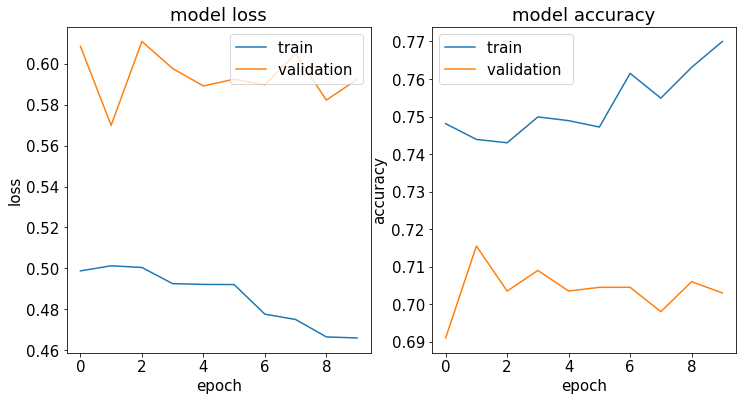

	Train: Min loss  0.466 at   9 --- Max acc  0.770 at   9 | 
	Validation : Min loss  0.570 at   1 --- Max acc  0.716 at   1 | 
-----------------------------------------------------------------------


In [85]:
histObj.name='' # name added to legend
plotLearningCurves(histObj) # the above defined function to plot learning curves

## Evaluating performances

Model evaluation: https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics

ROC curves (wikipedia): https://en.wikipedia.org/wiki/Receiver_operating_characteristic

There are many ways to evaluate the quality of a model’s predictions. In the previous set of exercises, we were evaluating the metrics and losses of the training and validation samples.

A largely used evaluation metrics for binary classification tasks is the receiver operating characteristic curve, or **ROC curve**.

First, we introduce the terms `positive` and `negative` referring to the classifier’s prediction, and the terms `true` and `false` referring to whether the network prediction corresponds to the observation (the "truth" level). In our top-quark tagging exercise, we can think the `negative` outcome as the one labelling background (that, in the last softmax layer of our network would mean a number close to 0, if correctly predicted), and the `positive` outcome as the one labelling signal (that, in the last softmax layer of our network would mean a number close to 1, if correctly predicted). 

* TP (true positive): the observation is positive, the prediction is positive (*correct result*)
* FP (false positive): the observation is negative, but the prediction is positive (*unexpected result*)
* TN (true negative): the observation is negative, the prediction is negative (*correct absence of result*)
* FN (false negative): the observation is positive, the prediction is negative (*missing result*)

Some additional definitions:

* **TPR (true positive rate)**: how often the network predicts a positive outcome, when the input is positive: $TPR = \frac{TP}{TP+FN}$
* **FPR (false positive rate)**: how often the network predicts a positive outcome, when the input is negative: $FPR = \frac{FP}{FP+TN}$

A good classifier should give an high TPR and a small FPR.

Quoting wikipedia:

"A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, probability of detection, or signal efficiency in high energy physics. The false-positive rate is also known as the probability of false alarm or fake rate in high energy physics."


The ROC curve requires the true binary value (0 or 1, background or signal) and the probability estimates of the positive (signal) class.

This figure shows an example of such a ROC curve, than can be obtained with **`roc_curve`** method available in sklearn libraries:
<br>
<img src="img/roc.png" width="500" >

The **`roc_auc_score`** function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC. By computing the area under the roc curve, the curve information is summarized in one number. For more information see: https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve.


The AUC is the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one. The higher the AUC, the better the performance of the classifier. If the AUC is 0.5, the classifier is uninformative, i.e., it will rank equally a positive or a negative observation.

Let's calculate first the AUC of our previously trained model.

In [73]:
# Needed libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [74]:
print("Running on test sample. This may take a moment.")
ret = model.predict(df_test[cols].as_matrix())
AUC = roc_auc_score(df_test["is_signal_new"], ret[:,1])
print("Test Area under Curve = {0}".format(AUC))

Running on test sample. This may take a moment.
Test Area under Curve = 0.800370037004


Now we can build the ROC curve. Let's try to understand what is done each step.

First we need to predict the probabilities of each event in our test sample. We can use the function **`predict_proba`**. Let's print out its output.

The number of computed probabilities for each row corresponds the number of the classification categories (2 in our case, hence we get two columns).

* The first column tells us: *what is the probability that this event is classified in the class 0, i.e., as background?*
* The second column tells us: *what is the probability that this event is classified in the class 1, i.e., as signal?*

We want to compute the TPR and the FPR, hence we are interested in the second column (we are asking ourself, *how likely it is that this event is signal?*). Then we save this output as a column of the DataFrame. 

In [75]:
probs = model.predict_proba(df_test[cols]) #predict probability over test sample
print(probs)
df_test["sigprob"] = probs[:,1] #save probabilities in df

[[ 0.70478696  0.29521304]
 [ 0.65286684  0.34713313]
 [ 0.40648261  0.59351742]
 ..., 
 [ 0.58809572  0.41190425]
 [ 0.01755248  0.98244756]
 [ 0.45711961  0.54288042]]


It is very instructive to get a feeling of what are representing these probabilities. Let's save them as two separate numpy arrays, for background and signal. Let's plot them together.

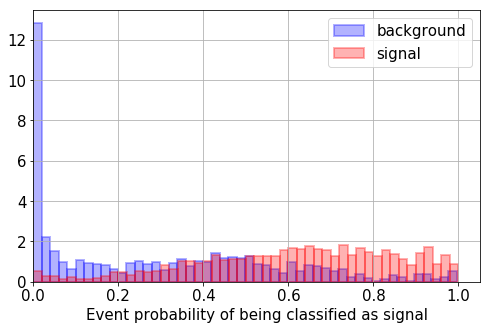

In [76]:
back = np.array(df_test["sigprob"].loc[df_test["is_signal_new"]==0].values)
sign = np.array(df_test["sigprob"].loc[df_test["is_signal_new"]==1].values)
#saves the df_test["sigprob"] column when the event is signal or background

plt.figure(figsize=(8,5))
plt.rcParams.update({'font.size': 15}) #Larger font size

#Let's plot an histogram:
# * y-values: back/sign probabilities
# * 50 bins
# * alpha: filling color transparency
# * density: it should normalize the histograms to unity
plt.hist(back, 50, color='blue', edgecolor='blue', lw=2, label='background', alpha=0.3, density=True)
plt.hist(sign, 50, color='red', edgecolor='red', lw=2, label='signal', alpha=0.3, density=True)

plt.xlim([0.0, 1.05])
plt.xlabel('Event probability of being classified as signal')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

We can clearly appreciate that background events (in blue) have a lower probability of being classified as signal, whilst signal events (in red) have a larger probability of being classified as signal.

Then we use the **`roc_curve`** method and we retain the outputs (that are, the TPR and the FPR). TPR and FPR are obtained by scanning the values of the previous histogram. We can finally plot the curve and the AUC.

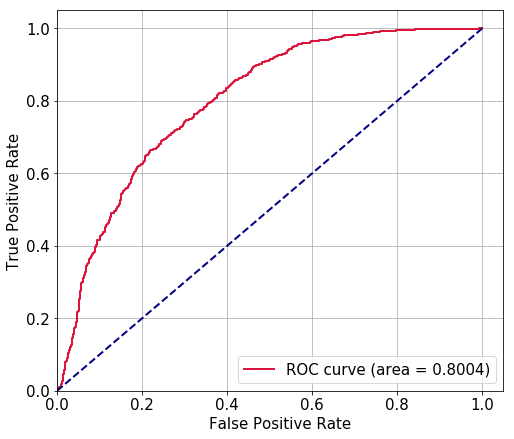

In [77]:
fpr, tpr, _ = roc_curve(df_test["is_signal_new"], df_test["sigprob"]) #extract true positive rate and false positive rate
plt.figure(figsize=(8,7))
plt.rcParams.update({'font.size': 15}) #Larger font size
plt.plot(fpr, tpr, color='crimson', lw=2, label='ROC curve (area = {0:.4f})'.format(AUC))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

These performances are not that great. Can they be improved?

* We are just using the first 20 jet constituents, one can try to add more constituents
* One can try to add more epochs (beware of overfitting!)
* Add more data to the training/validation/testing sample (but don't use the same data for testing!). A good rule is: if you use $n_T$ events for training, use $0.2 \times n_T$ for both validation and testing.
* One can add more **`Dense`** layers, with a different number of nodes
* One can try a different optimizer, different loss function
* Instead of feeding the network with $E$, $p_{X}$, $p_{Y}$, $p_{Z}$, one can try to build other physically motivated variables, such as the mass of the constituents, or the mass of the jet
* One can try to renormalize the energies

# Challenge submission

Once you manage to improve the network performances, you can submit your results and participate to our ML challenge. The challenge test sample is available in this workspace, but the truth labels (`is_signal_new`) are removed, so that you can't compute the AUC.

* You can participate as a single participant or as a team
* The winner is the one scoring the best AUC in the challenge test sample
* In the next box, you will find some lines of code for preparing an output zip file, containing your model and the weights you obtained out of your training
* Choose a meaningful name for your result zip file (i.e. your name, or your team name, but avoid to submit `results.zip`)
* Download the zip file and upload it here: https://desycloud.desy.de/index.php/s/n38qi4eGdgKWLTQ
* You can submit multiple results, paying attention to name them accordingly (add the version number, such as `v1`, `v34`, etc.)
* You can use both TopTagging_1 or TopTagging_2 as a starting point (train over constituents or over images)
* We will consider your best result for the final score
* The winner will be asked to present his architecture

**Have fun!**


In [3]:
### Evaluate performance on independent sample
# DO NOT CHANGE BELOW!
from IPython.display import FileLink, FileLinks

# Prepare input
store_test_challenge = pandas.HDFStore("jet_data/test_without_truth_100k.h5")
df_test_challenge = store_test_challenge.select("table")

# Run DNN
print("Running on full test sample. This may take a moment.")
ret = model.predict(df_test_challenge[cols].as_matrix())
np.save("result.npy",ret[:,1])
!zip result.zip result.npy
print("Done. Click below  to download result")
FileLink('result.zip')

Running on full test sample. This may take a moment.


NameError: name 'model' is not defined

Upload your results here:
    
https://desycloud.desy.de/index.php/s/n38qi4eGdgKWLTQ